Name : Uday Mahadev Sonar (Pattar)

Roll No. DS-28

PRN : 2122000332

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import os

# Define paths
train_path = '/content/drive/MyDrive/Data/train'
validation_path = '/content/drive/MyDrive/Data/valid'
test_path = '/content/drive/MyDrive/Data/test'

# Load annotations and create DataFrame
def load_annotations(folder_path):
    annotations_path = os.path.join(folder_path, '_annotations.csv')
    df = pd.read_csv(annotations_path)
    df['filename'] = df['filename'].apply(lambda x: os.path.join(folder_path, x))
    return df

train_df = load_annotations(train_path)
validation_df = load_annotations(validation_path)
test_df = load_annotations(test_path)

print("Training DataFrame:")
print(train_df.head())

print("Validation DataFrame:")
print(validation_df.head())

print("Test DataFrame:")
print(test_df.head())


Training DataFrame:
                                            filename  width  height class  \
0  /content/drive/MyDrive/Data/train/ST_20190917_...    416     416  mask   
1  /content/drive/MyDrive/Data/train/ST_20190917_...    416     416  mask   
2  /content/drive/MyDrive/Data/train/ST_20190917_...    416     416  mask   
3  /content/drive/MyDrive/Data/train/ST_20190917_...    416     416  mask   
4  /content/drive/MyDrive/Data/train/ST_20190917_...    416     416  mask   

   xmin  ymin  xmax  ymax  
0   336    71   402   121  
1   245    69   294   121  
2   161    69   209   121  
3   140   128   216   214  
4   275   129   345   211  
Validation DataFrame:
                                            filename  width  height class  \
0  /content/drive/MyDrive/Data/valid/1197620896_j...    416     416  mask   
1  /content/drive/MyDrive/Data/valid/1197620896_j...    416     416  mask   
2  /content/drive/MyDrive/Data/valid/1197620896_j...    416     416  mask   
3  /content/drive/M

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Training generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Validation generator
validation_generator = datagen.flow_from_dataframe(
    dataframe=validation_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Testing generator
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Ensure order is preserved
)


Found 696 validated image filenames belonging to 2 classes.
Found 162 validated image filenames belonging to 2 classes.
Found 96 validated image filenames belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from tensorflow.keras.applications import DenseNet121, ResNet50, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def create_pretrained_model(base_model):
    for layer in base_model.layers:
        layer.trainable = False  # Freeze pre-trained layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

densenet_model = create_pretrained_model(DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
resnet_model = create_pretrained_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
inception_model = create_pretrained_model(InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))


In [6]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 920.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [14]:
def train_model(model, train_gen, val_gen, epochs=10):
    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen
    )
    return history

print("Training CNN...")
cnn_history = train_model(cnn_model, train_generator, validation_generator)

print("Training DenseNet...")
densenet_history = train_model(densenet_model, train_generator, validation_generator)

print("Training ResNet...")
resnet_history = train_model(resnet_model, train_generator, validation_generator)

print("Training InceptionNet...")
inception_history = train_model(inception_model, train_generator, validation_generator)


Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.7202 - loss: 1.0312 - val_accuracy: 0.8765 - val_loss: 0.5060
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.8338 - loss: 0.4582 - val_accuracy: 0.8765 - val_loss: 0.3769
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8355 - loss: 0.3806 - val_accuracy: 0.8765 - val_loss: 0.3968
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.8446 - loss: 0.3535 - val_accuracy: 0.8765 - val_loss: 0.3882
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.8577 - loss: 0.3489 - val_accuracy: 0.8765 - val_loss: 0.4123
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.8459 - loss: 0.3542 - val_accuracy: 0.8765 - val_loss: 0.3641
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8443 - loss: 0.3375 - val_accuracy: 0.8765 - val_loss: 0.4144
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.8566 - loss: 0.3538 - val_accuracy: 0.8765 - val_loss

In [15]:
# Evaluate models
cnn_eval = cnn_model.evaluate(test_generator)
densenet_eval = densenet_model.evaluate(test_generator)
resnet_eval = resnet_model.evaluate(test_generator)
inception_eval = inception_model.evaluate(test_generator)

# Print accuracy
print(f"CNN Accuracy: {cnn_eval[1]*100:.2f}%")
print(f"DenseNet Accuracy: {densenet_eval[1]*100:.2f}%")
print(f"ResNet Accuracy: {resnet_eval[1]*100:.2f}%")
print(f"InceptionNet Accuracy: {inception_eval[1]*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9583 - loss: 0.2193
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.9583 - loss: 0.2077
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.9583 - loss: 0.2863
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9583 - loss: 0.2060
CNN Accuracy: 94.79%
DenseNet Accuracy: 94.79%
ResNet Accuracy: 94.79%
InceptionNet Accuracy: 94.79%


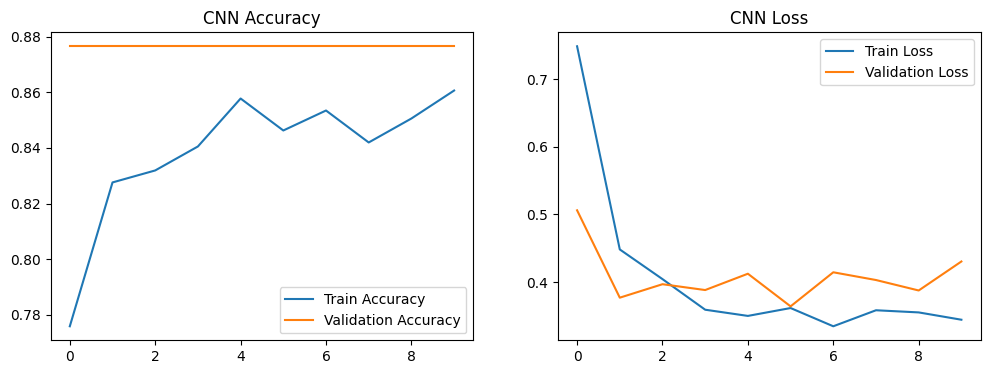

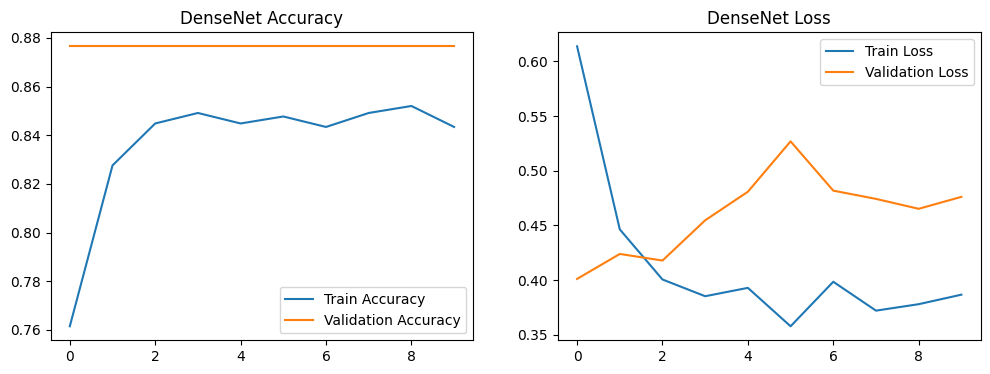

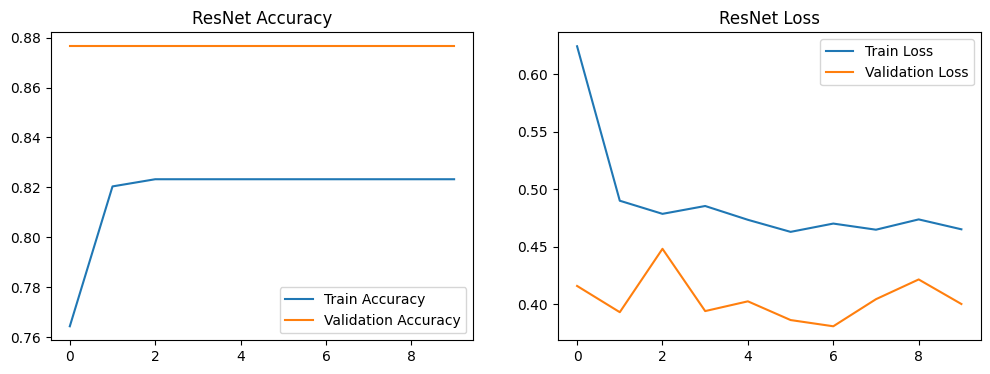

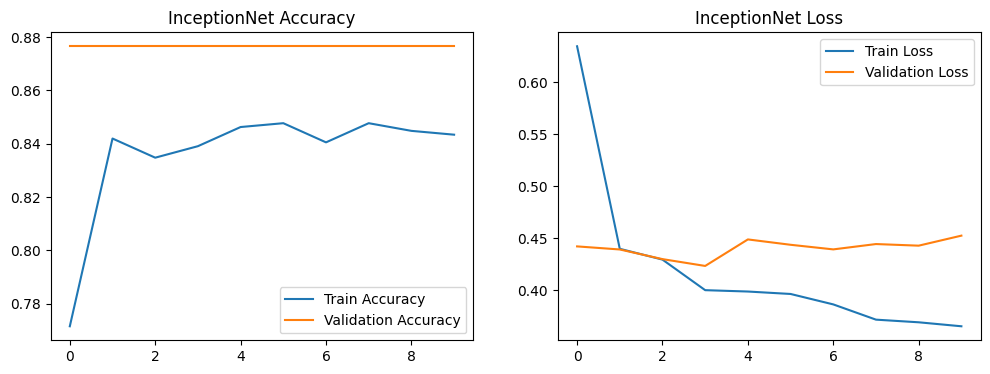

In [16]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

# Plot histories
plot_history(cnn_history, 'CNN')
plot_history(densenet_history, 'DenseNet')
plot_history(resnet_history, 'ResNet')
plot_history(inception_history, 'InceptionNet')
